<a href="https://colab.research.google.com/github/ddenebb/estructures_Dataframe/blob/main/Tasca_M8_T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 1

Download the attached dataset, of records of Facebook posts about Thailand, and rank the different records using the K-means algorithm.

In [43]:
from google.colab import drive
drive.mount('/content/drive')
#images_dir = '/content/gdrive/My Drive/Images'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 8/Data/Publicacions Facebook Thailandia.csv"
import pandas as pd

df = pd.read_csv(path)

print(df.info(memory_usage='deep'))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


K-means is an unsupervised learning algorithm used for clustering data points into groups based on their similarity. In order to use K-means on the dataset, it will need to be prepared selecting relevant columns, normalizing the data, and choosing the appropriate number of clusters.

Here are some steps that can be followed to prepare the dataset for K-means:

Remove irrelevant columns: Based on the analysis goals, columns that are not relevant to the analysis or are not numeric may be removed. For example, 'status_id', 'status_type', and 'status_published' columns may not be relevant for clustering analysis. They can be dropped using the drop() method.

Normalize the data: Since K-means is sensitive to the scale of the data, it is recommended to normalize the data so that all columns have the same scale. The StandardScaler class from the sklearn.preprocessing module can be used to normalize the data.

Choose the number of clusters: The number of clusters is a hyperparameter that needs to be chosen based on the analysis goals and the structure of the data. One way to determine the optimal number of clusters is to use the elbow method, which involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and selecting the number of clusters where the decrease in WCSS starts to level off.

This code loads the dataset, drops the irrelevant columns, checks for missing values and duplicated rows, and displays the data types and basic statistics of the numerical columns. 

In [58]:
print("Number of duplicate records:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Drop irrelevant columns
df = df.drop(['status_id', 'status_type', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)

# Check for missing values
print(df.isnull().sum())

# Check the data types of columns
print(df.dtypes)

# Check the basic statistics of the numerical columns
print(df.describe())


Number of duplicate records: 51
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64
num_reactions    int64
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
dtype: object
       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    6999.000000   6999.000000  6999.000000  6999.000000  6999.000000   
mean      224.994571    225.552079    40.258608   209.946707    12.751536   
std       452.880746    892.743010   132.046903   439.550330    40.106872   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        58.000000      4.000000     0.000000    57.000000     0.000000   
75%       216.000000    

In [49]:
df


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


Number of outliers: 2886


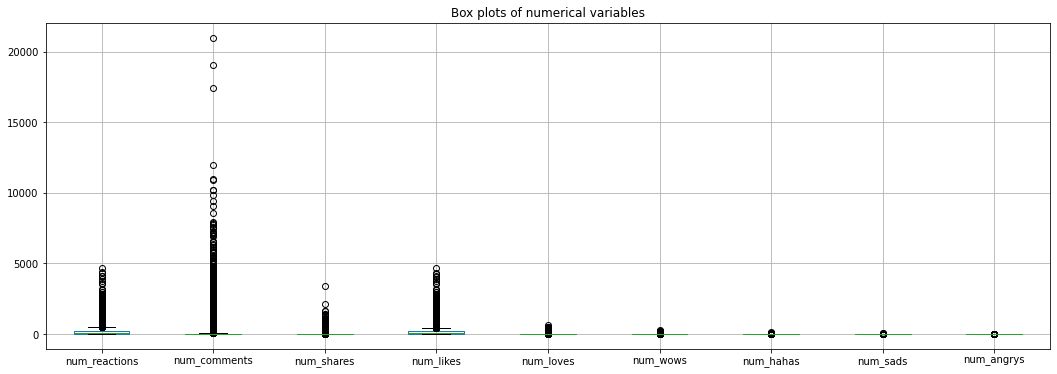

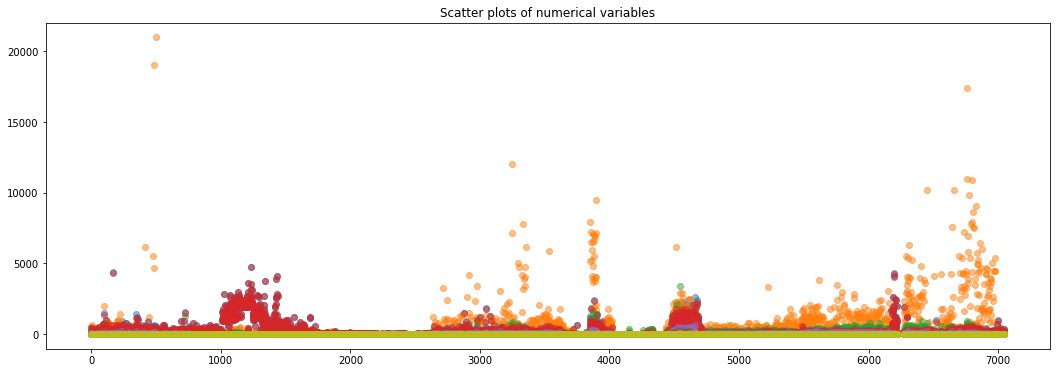

In [59]:
# Calculate the IQR for each column
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Identify any outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
print("Number of outliers:", outliers.sum())

# Visualize the outliers using box plots
plt.figure(figsize=(18, 6)) # set the figure size to 10 inches wide by 6 inches high
df.boxplot()
plt.title("Box plots of numerical variables")
plt.show()

# Visualize the outliers using scatter plots
plt.figure(figsize=(18, 6)) # set the figure size to 10 inches wide by 6 inches high
for i in range(df.shape[1]):
    plt.scatter(df.index, df.iloc[:, i], alpha=0.5)
    plt.title("Scatter plots of numerical variables")
plt.show()


If a dataset contains a significant number of outliers (in this case 2886 out of 6999) it may be necessary to determine whether they are legitimate or indicative of data issues. Various strategies exist for dealing with outliers, including:

Removing them: When outliers are likely data errors or do not represent the true distribution of the data, it may be appropriate to remove them. However, doing so may have implications for the overall analysis if a large proportion of data is eliminated.
Transforming the data: Applying transformations to the data, such as a logarithmic transformation, can minimize the influence of outliers and improve the data's normality.
Using robust methods: Robust techniques like robust regression or clustering are less sensitive to outliers and can generate more accurate results even when outliers are present.
Selecting the best approach depends on the unique features of the dataset and the objectives of the analysis.
In this case robust clustering will be performed later on when creating the hierarchical model.

In [52]:
print(df.shape)

(6999, 9)


Normalize the data using standardization

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df.select_dtypes(include='number'))

In [83]:
df_std

array([[ 0.67131834,  0.32088561,  1.67938232, ...,  0.07606935,
         0.51816049, -0.15999034],
       [-0.16560635, -0.25266868, -0.30490291, ..., -0.17577993,
        -0.15705926, -0.15999034],
       [ 0.00442848,  0.011704  ,  0.12679273, ...,  0.07606935,
        -0.15705926, -0.15999034],
       ...,
       [-0.49242655, -0.25266868, -0.30490291, ..., -0.17577993,
        -0.15705926, -0.15999034],
       [ 0.2782508 , -0.239226  , -0.13828354, ..., -0.17577993,
        -0.15705926, -0.15999034],
       [-0.45930288, -0.25266868, -0.30490291, ..., -0.17577993,
        -0.15705926, -0.15999034]])

Perform principal component analysis (PCA)

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_std)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.38768024 0.19194911]


In [85]:
df_pca

array([[ 2.26417905, -0.07891973],
       [-0.62979816,  0.0562892 ],
       [ 0.10038237, -0.03813099],
       ...,
       [-0.80860801, -0.37194337],
       [-0.27070347,  0.58074218],
       [-0.80040715, -0.32336044]])

Visualize the principal components

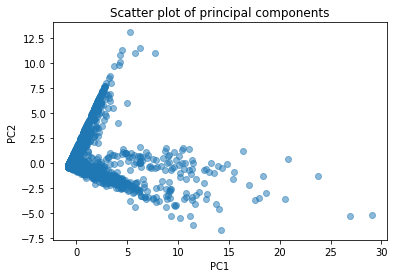

In [86]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot of principal components")
plt.show()

Determine the optimal number of clusters using elbow method

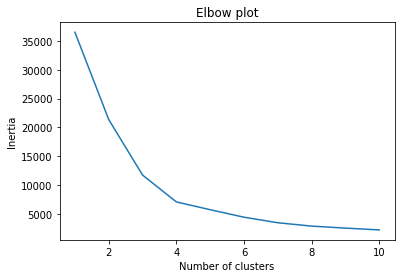

In [87]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow plot")
plt.show()



# Exercise 2

Classify the different registers using the hierarchical clustering algorithm.

Hierarchical clustering is a type of clustering algorithm used in machine learning and data analysis. The goal of hierarchical clustering is to group similar data points into clusters based on their distance or similarity. The algorithm works by initially treating each data point as its own cluster, and then iteratively merging clusters that are closest together, until all data points are in a single cluster or a desired number of clusters is reached.


# Create K-means clustering and hierarchical robust clustering models



Next we we will perform K-means clustering with 3 clusters (n_clusters=4). The fit_predict() method is used to fit the K-means model to the data and predict the cluster labels for each record in the dataset. The resulting cluster labels are added as a new column ('Cluster') to the original dataframe.

Finally, the number of records in each cluster will be printed using the value_counts() method. This will give us an idea of how many records belong to each cluster.

In [109]:
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_pca)
labels_kmeans = kmeans.labels_


pred_y = kmeans.fit_predict(df_pca)

# Add cluster labels to the original dataframe
df['Cluster'] = pred_y

# Print the number of records in each cluster
print(df['Cluster'].value_counts())

0    5847
2     668
3     379
1     105
Name: Cluster, dtype: int64


In [110]:
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,529,512,262,432,92,3,1,1,0,2
1,150,0,0,150,0,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0,0
3,111,0,0,111,0,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0,0
7047,2,0,0,1,1,0,0,0,0,0
7048,351,12,22,349,2,0,0,0,0,0


Create hierarchical robust clustering model

In [113]:
# Hierarchical robust clustering
from scipy.cluster.hierarchy import linkage, fcluster
Z = linkage(df_pca, method='ward')
labels_hclustering = fcluster(Z, 4, criterion='maxclust')

# Exercise 3

Calculate the clustering performance using a parameter such as silhouette.

The silhouette score measures how well each data point fits into its assigned cluster, based on both the distance between the data point and the other points in its assigned cluster, and the distance between the data point and the points in the nearest cluster.

Silhouette score is calculated for the k-means and hierarchical clustering algorithms using the silhouette_score function from the sklearn.metrics module. The silhouette score is computed for each data point and then averaged to give an overall score for the clustering performance.

The resulting silhouette score is printed to the console, indicating how well the clustering algorithm has performed. A higher score indicates better clustering performance, with a maximum score of 1 indicating that all data points are correctly assigned to their respective clusters.

In [114]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(df_pca, labels_kmeans)
silhouette_hclustering = silhouette_score(df_pca, labels_hclustering)
print("Silhouette score for K-means clustering:", silhouette_kmeans)
print("Silhouette score for hierarchical clustering:", silhouette_hclustering)



Silhouette score for K-means clustering: 0.7694865087196293
Silhouette score for hierarchical clustering: 0.7199825653848912


Visualize the clusters

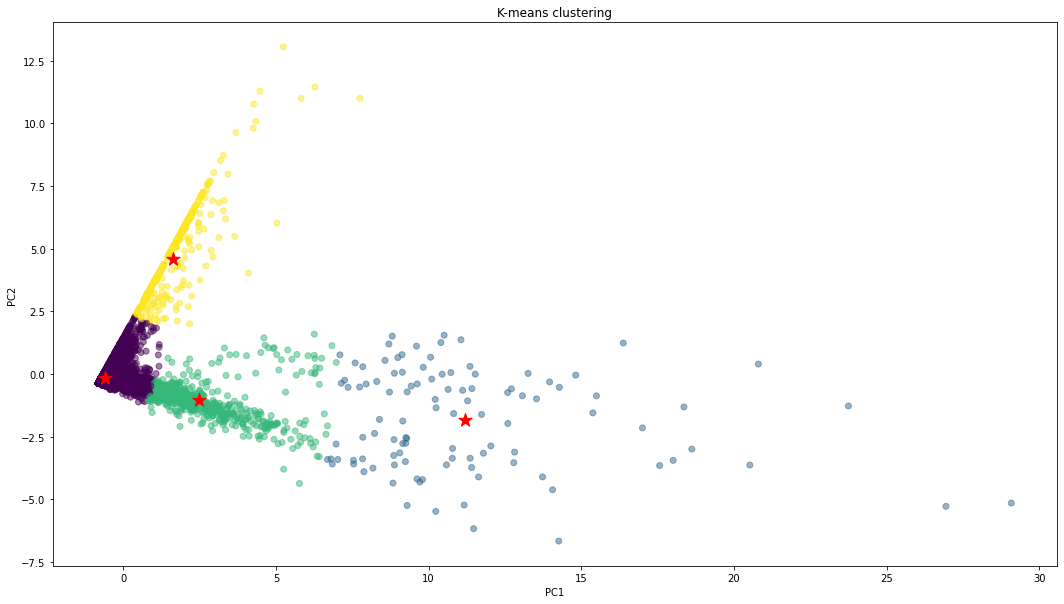

In [129]:
# Set figure size
plt.figure(figsize=(18,10))

# Plot K-means clustering with centroids
centroids_kmeans = kmeans.cluster_centers_
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_kmeans, alpha=0.5)
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', marker='*', s=200)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clustering")
plt.show()

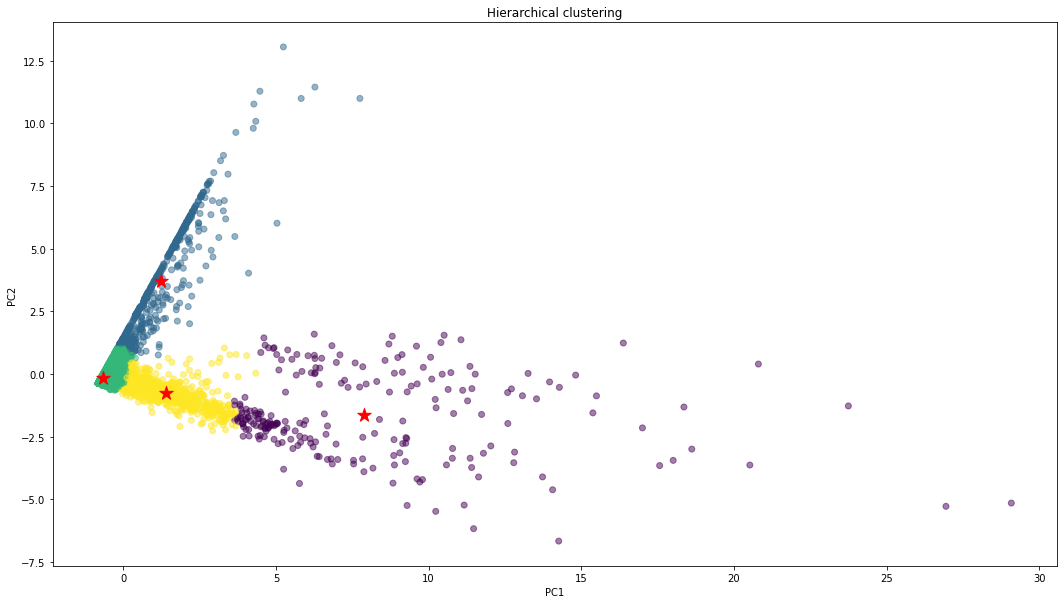

In [130]:

# create scatter plot with labels
plt.figure(figsize=(18, 10))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_hclustering, alpha=0.5)

# get centroids of each cluster
from scipy.cluster.hierarchy import fcluster
k = 4
hclustering = linkage(df_std, method='ward')
labels = fcluster(hclustering, k, criterion='maxclust')
centroids = []
for i in range(1, k+1):
    centroid = df_pca[labels_hclustering==i].mean(axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

# plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='r')

# set axis labels and title
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Hierarchical clustering")

# display plot
plt.show()

The four clusters are drawn using a scatter plot. Matplotlib will be used to create a scatter plot of the data points, where each point is colored according to its cluster assignment.

It can be seen that the data has been separated into 4 groups with a clear centroid, and though similar in general, there are differences in how the clusters are organized.